In [1]:
# %tensorflow_version 1.x

# Steps to solve Emergency vs Non-Emergency vehicle classification problem using Batch Normalization

<ol>1. Loading the dataset</ol>
<ol>2. Pre-processing the data</ol>
<ol>3. Creating training and validation set</ol>
<ol>4. Defining the model architecture</ol>
<ol> <ol>* Adding batch normalization layer(s) </ol></ol>
<ol>5. Compiling the model</ol>
<ol>6. Training the model</ol>
<ol>7. Evaluating model performance</ol>

## 1. Loading the dataset

In [2]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module
from keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [3]:
# reading the csv file
data = pd.read_csv('Dataset/emergency_classification.csv')

In [4]:
# create random number generator
seed = 42

In [5]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)

# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

## 2. Pre-processing the data

In [6]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [7]:
# normalizing the pixel values
X = X / X.max()

# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(0.0, 1.0)

## 3. Creating training and validation set

In [9]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

MemoryError: Unable to allocate 1.85 GiB for an array with shape (1646, 150528) and data type float64

In [ ]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

## 4. Defining the model architecture

### <ol>Without Batch Normalization</ol>

In [35]:
# defining the model architecture
model=Sequential()

model.add(InputLayer(shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,063,101 (57.46 MB)

 Trainable params: 15,063,101 (57.46 MB)

 Non-trainable params: 0 (0.00 B)

## 5. Compiling the model

In [36]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(learning_rate=1e-5)

In [37]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

## 6. Training the model

In [49]:
# training the model for 50 epochs

model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 217ms/step - accuracy: 0.6209 - loss: 0.6603 - val_accuracy: 0.4391 - val_loss: 0.8941
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 185ms/step - accuracy: 0.6303 - loss: 0.6583 - val_accuracy: 0.4391 - val_loss: 0.8399
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 183ms/step - accuracy: 0.6421 - loss: 0.6479 - val_accuracy: 0.4391 - val_loss: 0.8104
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 186ms/step - accuracy: 0.6307 - loss: 0.6436 - val_accuracy: 0.4391 - val_loss: 0.7941
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - accuracy: 0.6503 - loss: 0.6335 - val_accuracy: 0.4391 - val_loss: 0.7685
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 187ms/step - accuracy: 0.6464 - loss: 0.6501 - val_accuracy: 0.4391 - val_loss: 0.7512
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - accuracy: 0.6387 - loss: 0.6504 - val_accuracy: 0.4391 - val_loss: 0.7320
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - accuracy: 0.6082 - loss: 0.6493 - val_accuracy: 0.

## 7. Evaluating model performance

In [50]:
y_pred = model.predict(X_valid)[:,0]
y_pred = np.where(y_pred < 0.5, 0, 1)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [51]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, y_pred), '%')

Accuracy on validation set: 0.5609065155807366 %


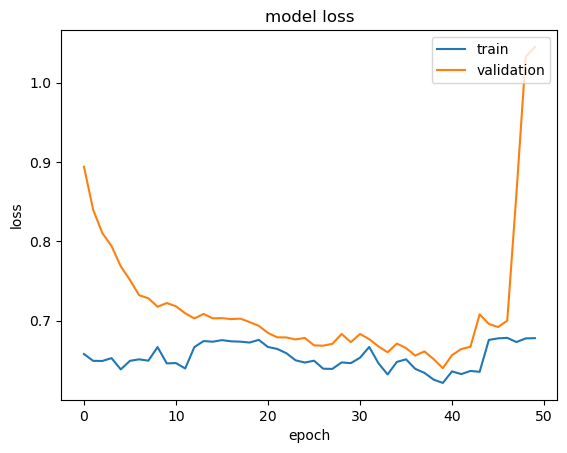

In [52]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## Defining the model architecture

### <ol>With Batch Normalization</ol>

In [53]:
# importing batch normalization layer
from keras.layers import BatchNormalization

In [54]:
# defining the model architecture and adding batch normalization layers
model=Sequential()

model.add(InputLayer(shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,063,501 (57.46 MB)

 Trainable params: 15,063,301 (57.46 MB)

 Non-trainable params: 200 (800.00 B)

- The 200 non-trainable parameters come from the Batch Normalization layer, which stores 100 running means and 100 running variances for the 100 features being normalized. These parameters are updated during training but are not learned via backpropagation, hence they are non-trainable.
- Each neuron is a features total we have 100 neurons so 100 features we comput 100 means and 100 standard deviations

## Compiling the model

In [55]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy
adam=Adam()
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

## Training the model

In [56]:
# training the model for 50 epochs using Batch Normalization
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 247ms/step - accuracy: 0.5317 - loss: 0.7077 - val_accuracy: 0.4391 - val_loss: 0.8445
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 191ms/step - accuracy: 0.5839 - loss: 0.6517 - val_accuracy: 0.4391 - val_loss: 0.7746
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step - accuracy: 0.5989 - loss: 0.6667 - val_accuracy: 0.4391 - val_loss: 0.7333
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 181ms/step - accuracy: 0.5816 - loss: 0.6728 - val_accuracy: 0.4405 - val_loss: 0.7066
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step - accuracy: 0.5937 - loss: 0.6622 - val_accuracy: 0.4433 - val_loss: 0.6942
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step - accuracy: 0.5784 - loss: 0.6645 - val_accuracy: 0.5609 - val_loss: 0.6881
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - accuracy: 0.5912 - loss: 0.6680 - val_accuracy: 0.5609 - val_loss: 0.6870
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 191ms/step - accuracy: 0.5901 - loss: 0.6585 - val_accuracy: 0.

## Evaluating model performance

In [57]:
y_pred = model.predict(X_valid)[:,0]
y_pred = np.where(y_pred < 0.5, 0, 1)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [58]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, y_pred), '%')

Accuracy on validation set: 0.5609065155807366 %


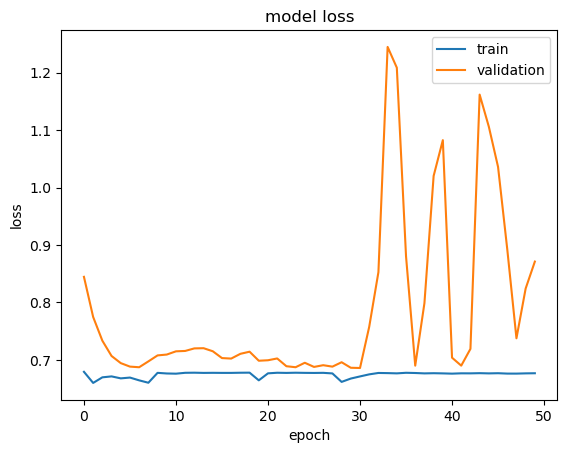

In [59]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()